# Morphing water vapor from SAPHIR
### Erfan Jahangir and Brian Mapes May 2018

Matlab codes have been used to create a set of hourly "synths" consisting of NaN-filled arrays with one orbit swath of data advected to the (hourly) target hour. 

Here we composite them into past and future composites, then process those
---------


In [130]:
import numpy as np 
import glob             # to list available files
import scipy.io as spio # to read the .mat files
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
plt.rcParams['animation.html'] = 'jshtml'
from PIL import Image
import datetime

In [131]:
%matplotlib inline 

-----
# FUTURE (backward advected) and PAST (forward advected) 
------

-------------
# Functions to create/update future and past composites
## works from files in arbitrary order
-------------

In [132]:
def update_future_composite(futurefiles_wildcard, WV_future, minobtime): 
     
# Before calling for the first time, build these arrays like this 
# Make lat x lon containers full of NaN for the WV and minimum ob time
#    WV_future = np.zeros( (NLAT,NLON) ); WV_future.fill(np.nan)
#    minobtime = np.zeros( (NLAT,NLON) ) + 9.99e19 # huge so any obs time will be less
    
    
# Loop over files, updating arrays wherever the obtime is smaller than the existing value
    print(np.size(glob.glob(futurefiles_wildcard)), ' files')
    for idx,filename in enumerate(glob.iglob(futurefiles_wildcard), start=0):
        mat = spio.loadmat(filename, squeeze_me=True, struct_as_record=False)
        
# Extract the "synth" data and time arrays, and set -999 values to NaN
        synth = mat['synth']
        data = synth.gridded        
        data [data < 0] = np.nan
        obtime = synth.time + data*0  # this will propagate the nan values
        
        
##################################################################
#### WORK WITH BUG FOR NOW -- 2018-05-27 DELETE ME WHEN FIXED ####
        obtime = (synth.time-np.mean(synth.time)) + data*0 + synth.synthTime + synth.tDisp_hrs/24.
##################################################################


# Grab the areas that are useful (that is, are the least-far in the future)
        useful = obtime < minobtime ### Ignore warings from comparing NaN to numbers. 
        WV_future[useful] = data  [useful]
        minobtime[useful] = obtime[useful]

        
### Display it
        fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# WV
        WV = axarr[0].imshow(WV_future, cmap='viridis_r')
        axarr[0].set_title('Future data composite so far '+filename)
        fig.colorbar(WV, ax=axarr[0])
# time      
        tob = axarr[1].imshow(24*((minobtime+WV_future*0) - (prodtime.days + prodtime.seconds/3600./24.)))
        axarr[1].set_title('Relative time of closest observation so far (hours)')
        fig.colorbar(tob, ax=axarr[1])
                
    return(WV_future, minobtime + WV_future*0) # NAN mask for minobtime

In [133]:
def update_past_composite(pastfiles_wildcard, WV_past, maxobtime): 
     
# Before calling for the first time, build these arrays like this 
# Make lat x lon containers full of NaN for the WV and maximum ob time
#    WV_past   = np.zeros( (NLAT,NLON) ); WV_past.fill(np.nan)
#    maxobtime = np.zeros( (NLAT,NLON) )  # zero so any obs time will be greater
    
# Loop over files, updating arrays wherever the obtime is greater than the existing value
    print(np.size(glob.glob(pastfiles_wildcard)), ' files')
    for idx,filename in enumerate(glob.iglob(pastfiles_wildcard), start=0):
        mat = spio.loadmat(filename, squeeze_me=True, struct_as_record=False)
        
# Extract the "synth" data and time arrays, and set -999 values to NaN
        synth = mat['synth']
        data = synth.gridded        
        data [data < 0] = np.nan
        obtime = synth.time + data*0  # this will propagate the nan values
        
# Grab the areas that are useful (that is, are the least-far in the future)
        useful = obtime > maxobtime   ### Ignore warings from comparing NaN to numbers. 
        WV_past[useful]   = data  [useful]
        maxobtime[useful] = obtime[useful]
        
        
### Display it
        fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# WV
        WV = axarr[0].imshow(WV_past, cmap='viridis_r')
        axarr[0].set_title('Past data composite so far '+filename)
        fig.colorbar(WV, ax=axarr[0])
# time      
        tob = axarr[1].imshow(24*((maxobtime+WV_past*0) - (prodtime.days + prodtime.seconds/3600./24.)))
        axarr[1].set_title('Relative time of closest observation so far (hours)')
        fig.colorbar(tob, ax=axarr[1])
                
    return(WV_past, maxobtime + WV_past*0) # NaN mask for maxobtime

------------
# Set time of desired hourly product:
------------

In [134]:
now = datetime.datetime(2012,1,4,0,0) + datetime.timedelta(hours=0)
prodtime = now - datetime.datetime(1970, 1, 1)

print(now.strftime('%Y%m%dT%H'), prodtime)

20120104T00 15343 days, 0:00:00


## Now build it up by composite

In [135]:
## future data (which has been "backward" advected) 
futurefiles_wildcard = 'Synths/*backward*' + now.strftime('%Y%m%dT%H') +'*mat'
#print(glob.glob(futurefiles_wildcard))

In [136]:
## past data (which has been "forward" advected) 
pastfiles_wildcard = 'Synths/*forward*' + now.strftime('%Y%m%dT%H') +'*mat'
#print( glob.glob(pastfiles_wildcard))

11  files


//anaconda/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
//anaconda/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


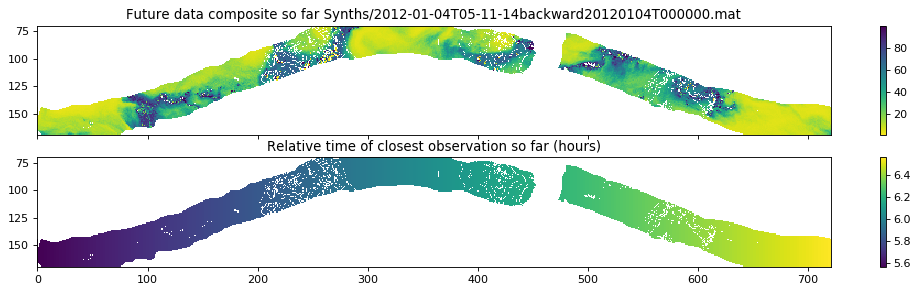

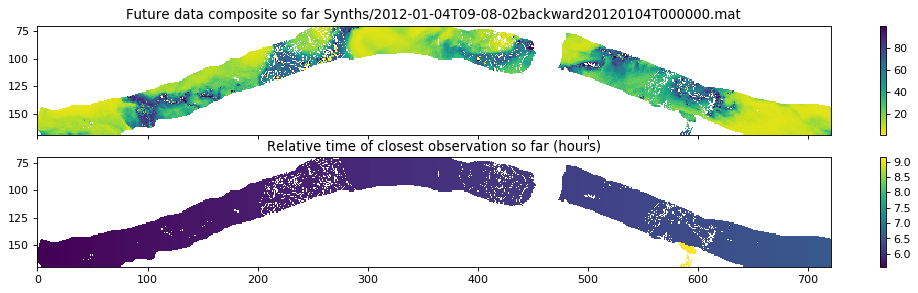

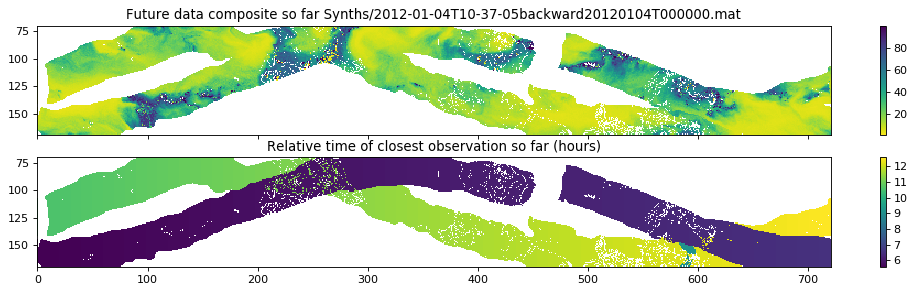

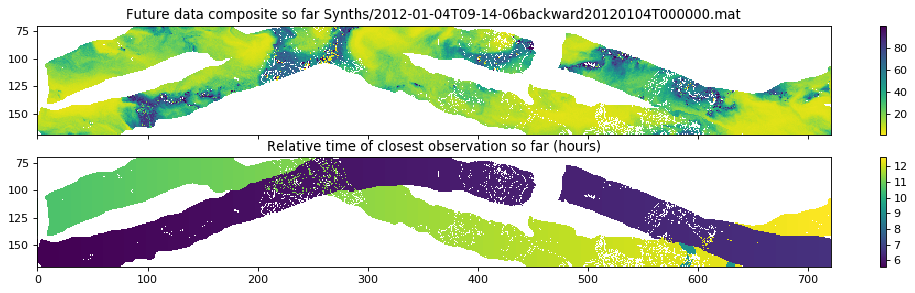

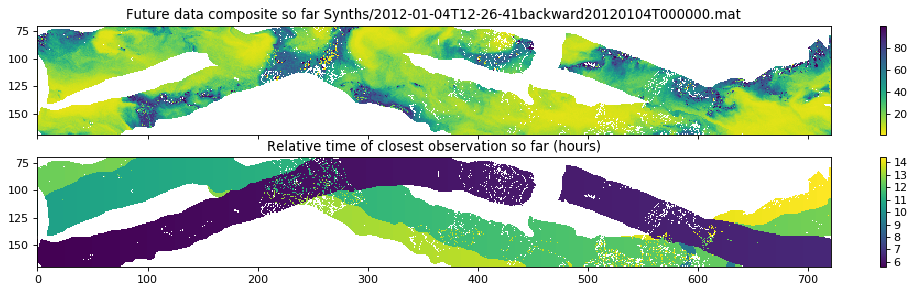

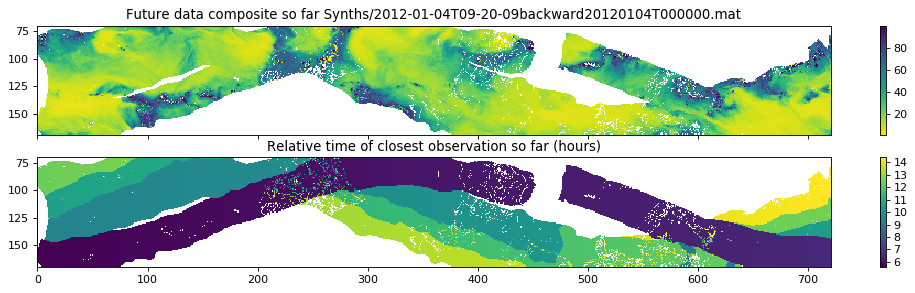

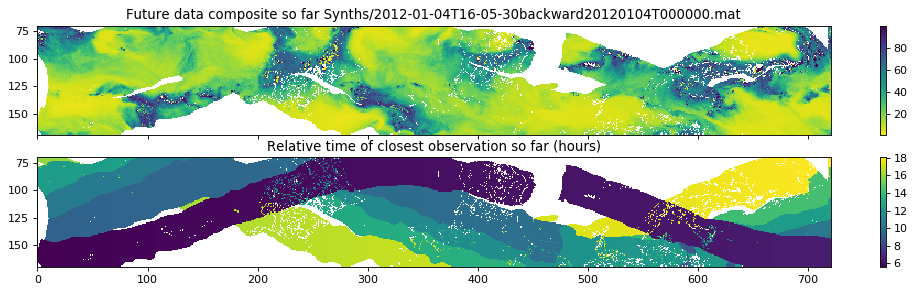

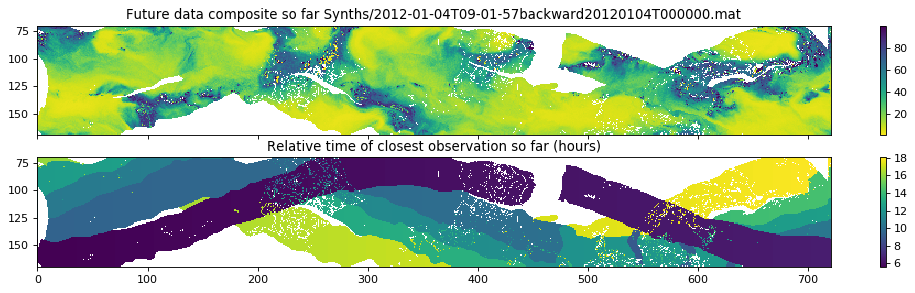

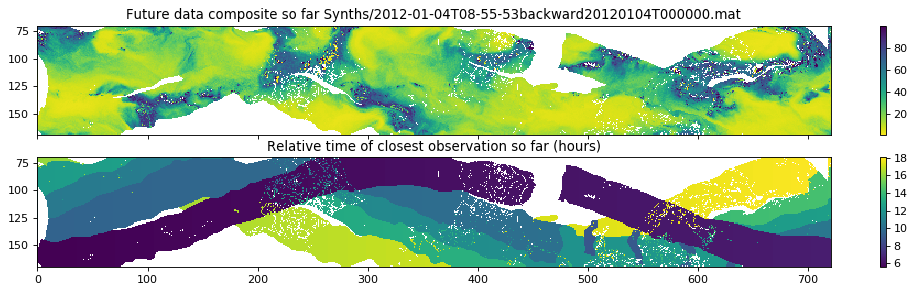

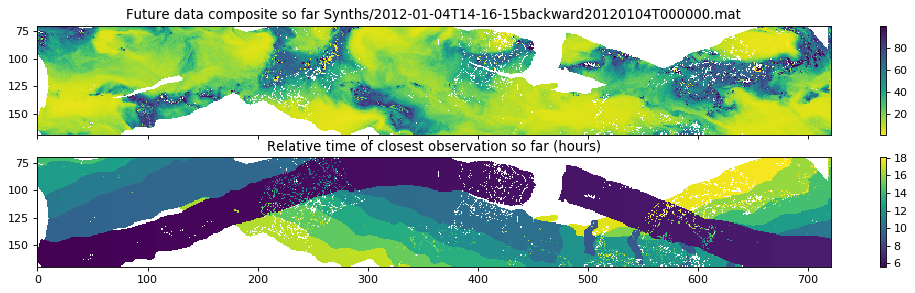

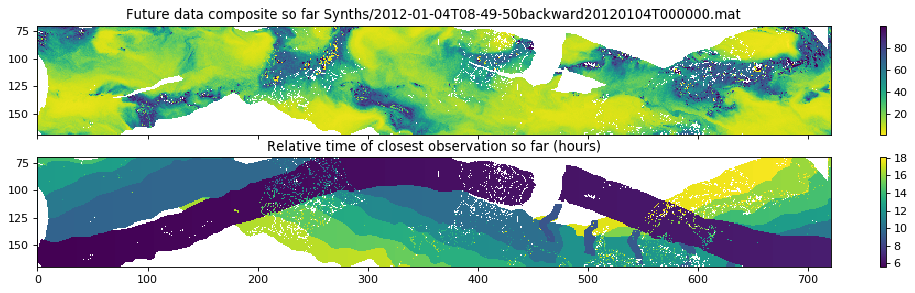

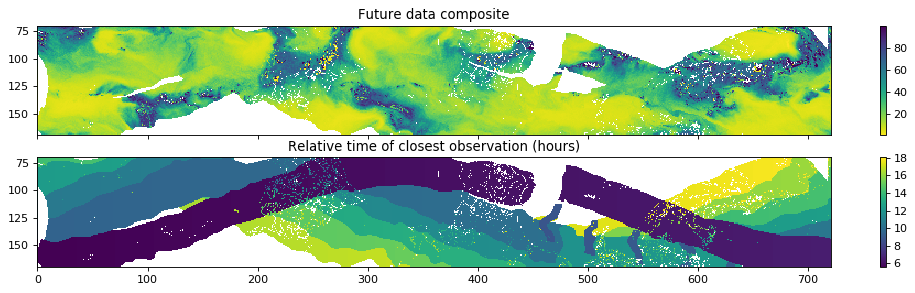

In [137]:
### FUTURE array update
WV_future = np.zeros( (NLAT,NLON) ); WV_future.fill(np.nan)
minobtime = np.zeros( (NLAT,NLON) ) + 9.99e19 # huge so any obs time will be less

WV_future, minobtime = update_future_composite(futurefiles_wildcard, WV_future, minobtime)


### Display it
fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# WV
WV = axarr[0].imshow(WV_future, cmap='viridis_r')
axarr[0].set_title('Future data composite')
fig.colorbar(WV, ax=axarr[0])
# time      
tob = axarr[1].imshow(24*(minobtime - (prodtime.days + prodtime.seconds/3600./24.)))
axarr[1].set_title('Relative time of closest observation (hours)')
fig.colorbar(tob, ax=axarr[1])

9  files


//anaconda/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
//anaconda/envs/MPO624/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


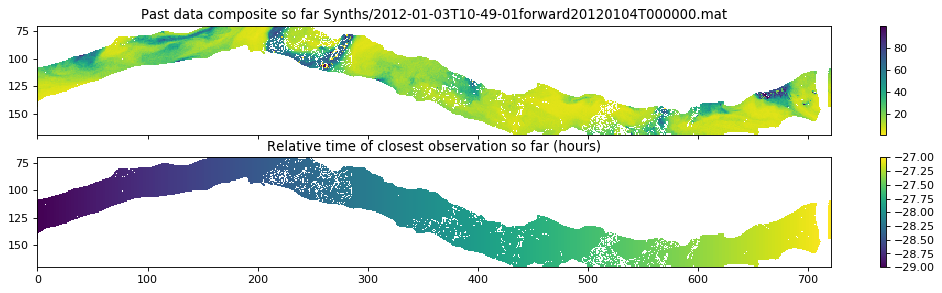

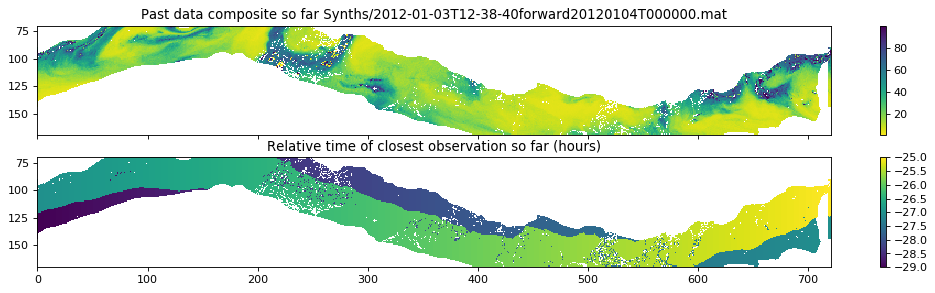

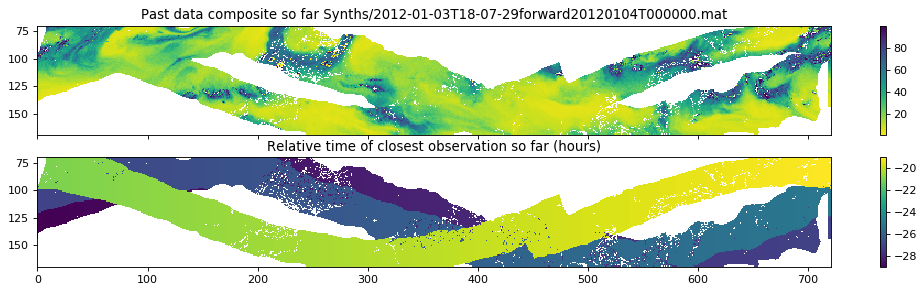

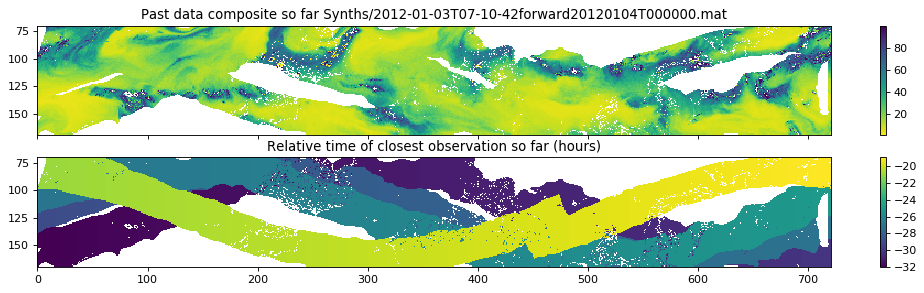

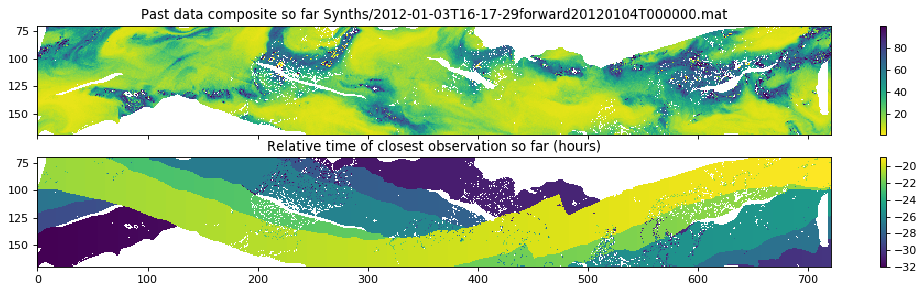

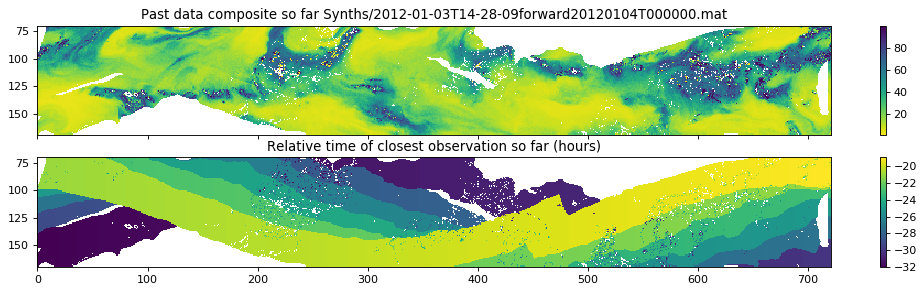

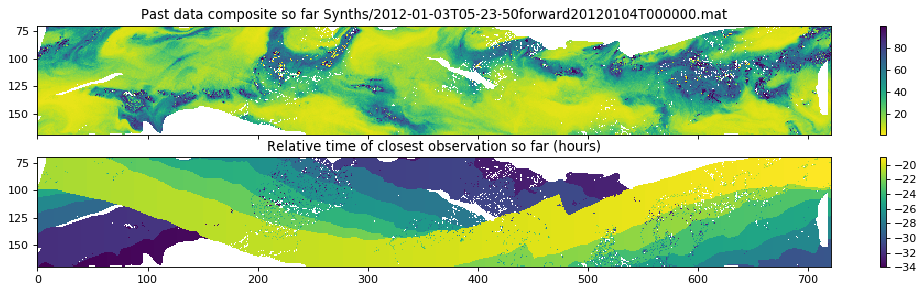

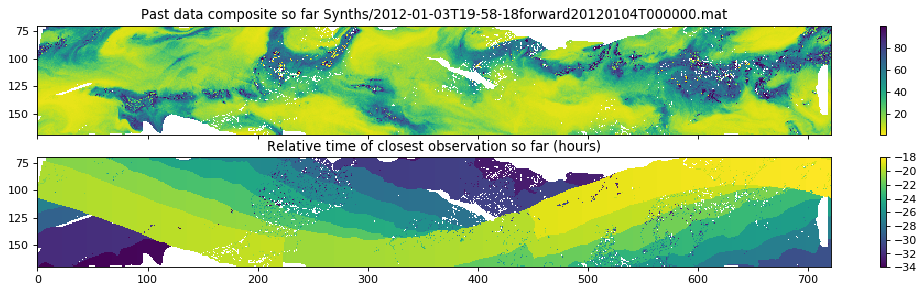

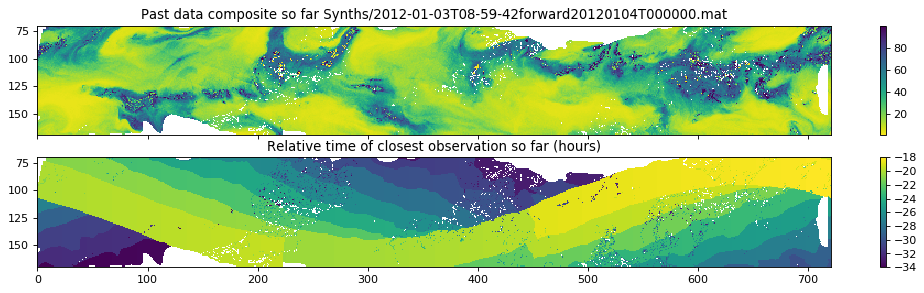

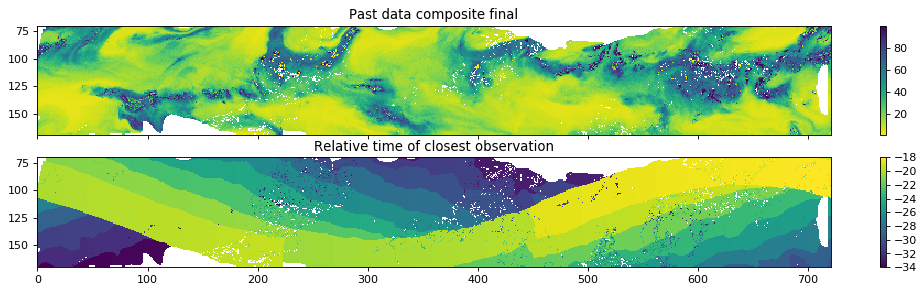

In [138]:
### update PAST arrays
WV_past = np.zeros( (NLAT,NLON) ); WV_past.fill(np.nan)
maxobtime = np.zeros( (NLAT,NLON) ) - 999. # negative, so any obs time will be greater

WV_past, maxobtime = update_past_composite(pastfiles_wildcard, WV_past, maxobtime)


### Display it
fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# WV
WV = axarr[0].imshow(WV_past, cmap='viridis_r')
axarr[0].set_title('Past data composite final')
fig.colorbar(WV, ax=axarr[0])
# time           
tob = axarr[1].imshow(24*(maxobtime - (prodtime.days + prodtime.seconds/3600./24.)))
axarr[1].set_title('Relative time of closest observation')
fig.colorbar(tob, ax=axarr[1])

# Combine future and past
## 1. Weighted sum: WV
## 2. d/dt, called AT (Analysis Tendency)

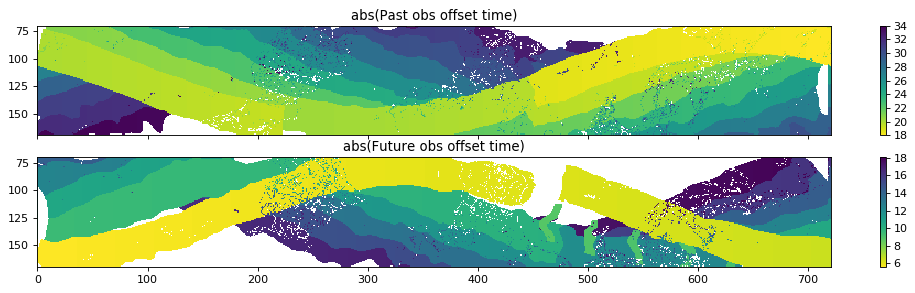

In [145]:
past_offset   = 24*abs(maxobtime - prodtime.days - prodtime.seconds/3600./24.)
future_offset = 24*abs(minobtime - prodtime.days - prodtime.seconds/3600./24.)


### Display it
fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# past
past = axarr[0].imshow(past_offset, cmap='viridis_r')
axarr[0].set_title('abs(Past obs offset time)')
fig.colorbar(past, ax=axarr[0])
# time           
future = axarr[1].imshow(future_offset, cmap='viridis_r')
axarr[1].set_title('abs(Future obs offset time)')
fig.colorbar(future, ax=axarr[1])

Text(0.5,1,'Time rate of change (Lagrangian) %/hour')

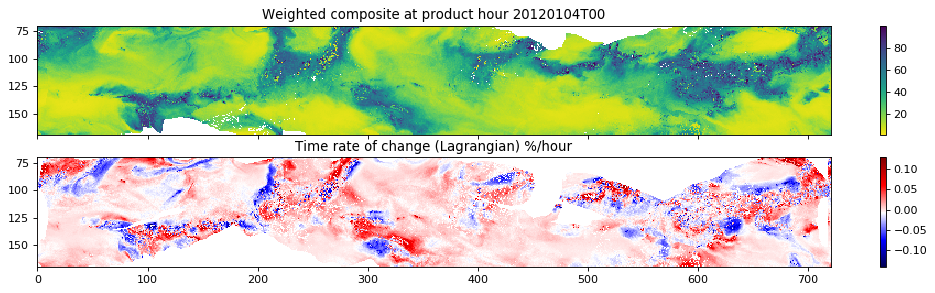

In [146]:
# Time derivative requires both values
AT = (WV_future - WV_past)/(past_offset + future_offset)


# Proximity-weighted average of the two estimates
WV = (WV_future*past_offset + WV_past*future_offset)/(past_offset + future_offset)

# Fill in the places where one estimate (future or past) is missing
WV[np.isnan(WV_future)] = WV_past  [np.isnan(WV_future)]
WV[np.isnan(WV_past  )] = WV_future[np.isnan(WV_past  )]


### Display it
fig, axarr = plt.subplots(2, sharex=True, figsize=(16, 4), dpi=80)

# WV
WVim = axarr[0].imshow(WV, cmap='viridis_r')
fig.colorbar(WVim, ax=axarr[0])
axarr[0].set_title('Weighted composite at product hour '+now.strftime('%Y%m%dT%H'))

# time           
ATim = axarr[1].imshow(AT/24., cmap='seismic')
fig.colorbar(ATim, ax=axarr[1])
axarr[1].set_title('Time rate of change (Lagrangian) %/hour')